In [1]:
from google.colab import files
uploaded = files.upload()

Saving Microsoft_Stock_Price_History.csv to Microsoft_Stock_Price_History.csv


Correlation Matrix:
                Price      Open      High       Low      Vol.  Daily Range
Price        1.000000  0.976964  0.988999  0.992854 -0.277333     0.061447
Open         0.976964  1.000000  0.991864  0.989037 -0.249471     0.111291
High         0.988999  0.991864  1.000000  0.991105 -0.234095     0.157067
Low          0.992854  0.989037  0.991105  1.000000 -0.292228     0.024236
Vol.        -0.277333 -0.249471 -0.234095 -0.292228  1.000000     0.410068
Daily Range  0.061447  0.111291  0.157067  0.024236  0.410068     1.000000


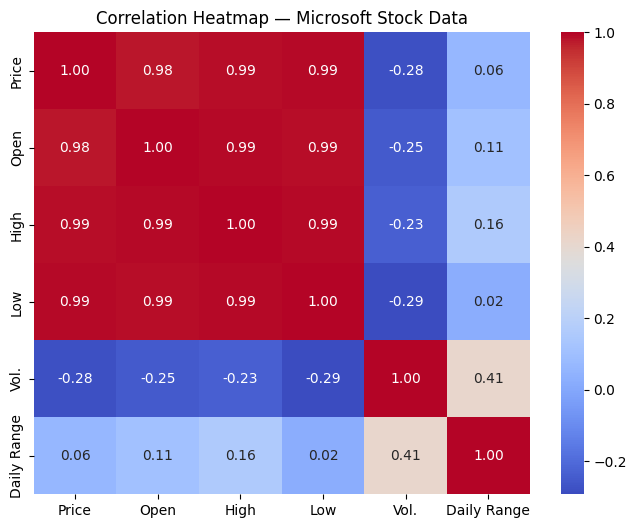


Correlation of each feature with Target Variable (Price):
Price          1.000000
Low            0.992854
High           0.988999
Open           0.976964
Daily Range    0.061447
Vol.          -0.277333
Name: Price, dtype: float64

Top 3 Features Most Related to Price:
Low     0.992854
High    0.988999
Open    0.976964
Name: Price, dtype: float64


In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read dataset
df = pd.read_csv("Microsoft_Stock_Price_History.csv")

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by Date
df = df.sort_values(by='Date')

# Convert 'Vol.' to numeric
def convert_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip()
        if 'M' in val:
            return float(val.replace('M', '')) * 1_000_000
        elif 'K' in val:
            return float(val.replace('K', '')) * 1_000
        elif val == '-':
            return None
        else:
            return float(val)
    return val

df['Vol.'] = df['Vol.'].apply(convert_volume)

# Create Daily Range feature
df['Daily Range'] = df['High'] - df['Low']

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr = numeric_df.corr()

# Display correlation matrix
print("Correlation Matrix:")
print(corr)

# --- Plot Heatmap ---
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap — Microsoft Stock Data")
plt.show()

# Find correlations with target variable (Price)
target_corr = corr['Price'].sort_values(ascending=False)

print("\nCorrelation of each feature with Target Variable (Price):")
print(target_corr)

# Get top 3 features most correlated with Price (excluding Price itself)
top_features = target_corr.drop('Price').head(3)
print("\nTop 3 Features Most Related to Price:")
print(top_features)
